## Abstract

The objective of this project is to explore the different characteristics that can affect decision-making in the dating app industry. We will examine how user profile attributes (photos, bios, demographics, interests), app-specific features (algorithms, design, messaging), user behavior (swiping patterns, communication styles), and broader social and psychological factors (biases, societal norms) interact to shape the success or failure of matches. By analyzing these diverse elements, we aim to gain a deeper understanding of the complex dynamics of online dating and the decision-making processes involved.

## Industry Overview

The dating app industry has grown rapidly over the past decade, driven by increased smartphone usage, shifting social norms around online dating, and advancements in matching algorithms. Major players like Tinder, Bumble, and Hinge dominate the market, offering a range of user experiences from casual connections to long-term relationships. The industry has also seen the rise of niche apps catering to specific communities and interests. Revenue is primarily generated through subscription models, in-app purchases, and advertising. As competition intensifies, platforms are focusing on user safety, AI-driven matchmaking, and expanding into international and underserved markets to sustain growth.

## About Dataset
This dataset provides a synthetic representation of user behavior on a fictional dating app. It contains 50,000 records with 19 features capturing demographic details, app usage patterns, swipe tendencies, and match outcomes.
Key features include gender, sexual orientation, location type, income bracket, education level, user interests, app usage time, swipe ratios, likes received, mutual matches, and match outcomes (e.g., "Mutual Match," "Ghosted," "Catfished"). The dataset is designed to be diverse and balanced, with categorical, numerical, and labeled variables for various analytical purposes.

-Source: https://www.kaggle.com/datasets/keyushnisar/dating-app-behavior-dataset/data

## Hypothesese

H1: Higher activity leads to more matches.

H2: More complete profiles achieve greater success.

H3: There are differences based on gender/orientation.

H4: Urban users are more successful.


# Variables

- **gender**: User’s gender identity  
- **sexual_orientation**: User’s sexual orientation  
- **location_type**: Type of user’s location  
- **income_bracket**: User’s income level  
- **education_level**: Highest education attained  
- **app_usage_time_min**: Daily app usage time in minutes  
- **app_usage_time_label**: Categorical label for usage time  
- **swipe_right_ratio**: Ratio of right swipes to total swipes  
- **swipe_right_label**: Categorical label for swipe ratio  
- **likes_received**: Number of likes received  
- **mutual_matches**: Number of total successful matches  
- **profile_pics_count**: Number of profile pictures  
- **bio_length**: Number of characters in bio  
- **message_sent_count**: Number of messages sent  
- **emoji_usage_rate**: Percentage of messages with emojis  
- **last_active_hour**: Last active hour of the user  
- **swipe_time_of_day**: Preferred timeframe to swipe  
- **match_outcome**: Categorical description of the match outcome  


In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

sns.set_style("darkgrid")

## Exploratory Data Analysis (EDA)

1. Data set Overview:

2. Summary Statistics:

3. Missing values:



In [3]:
##Import Data set 
url = "https://raw.githubusercontent.com/alvaro3dd/Dating_app_behavior_coderhouse/refs/heads/main/dating_app_behavior_dataset_modified.csv"

# Load the dataset
df = pd.read_csv(url)
df.head(10)

,gender,sexual_orientation,location_type,income_bracket,education_level,interest_tags,app_usage_time_min,app_usage_time_label,swipe_right_ratio,swipe_right_label,likes_received,mutual_matches,profile_pics_count,bio_length,message_sent_count,emoji_usage_rate,last_active_hour,swipe_time_of_day,match_outcome
0,Prefer Not to Say,Gay,Urban,High,Bachelor’s,"Fitness, Politics, Traveling",52,Moderate,0.60,Optimistic,139,69,4,44,75,0.36,13,Early Morning,Mutual Match
1,Male,Bisexual,Suburban,Upper-Middle,No Formal Education,"Languages, Fashion, Parenting",279,Extreme User,0.56,Optimistic,200,53,3,301,35,0.42,0,Morning,Mutual Match
2,Non-binary,Pansexual,Suburban,Low,Master’s,"Movies, Reading, DIY",49,Moderate,0.41,Optimistic,97,36,2,309,33,0.41,1,After Midnight,One-sided Like
3,Genderfluid,Gay,Metro,Very Low,Postdoc,"Coding, Podcasts, History",185,Extreme User,0.32,Balanced,153,32,5,35,5,0.07,21,Morning,Mutual Match
4,Male,Bisexual,Urban,Middle,Bachelor’s,"Clubbing, Podcasts, Cars",83,High,0.32,Balanced,88,38,1,343,34,0.11,22,After Midnight,One-sided Like
5,Genderfluid,Lesbian,Small Town,High,Associate’s,"Anime, Clubbing, DIY",138,Addicted,0.62,Optimistic,167,83,4,112,87,0.18,10,Early Morning,Mutual Match
6,Male,Asexual,Metro,Lower-Middle,High School,"Tech, Makeup, Parenting",161,Addicted,0.38,Balanced,124,63,3,202,82,0.32,14,Morning,Mutual Match
7,Female,Bisexual,Remote Area,Upper-Middle,Postdoc,"Spirituality, Sneaker Culture, Meditation",219,Extreme User,0.47,Optimistic,129,39,2,112,17,0.54,16,Evening,One-sided Like
8,Male,Gay,Suburban,High,Diploma,"MMA, Board Games, Startups",32,Moderate,0.23,Balanced,98,46,4,239,67,0.27,8,Late Night,One-sided Like
9,Prefer Not to Say,Gay,Remote Area,Upper-Middle,Bachelor’s,"Social Activism, Astrology, Photography",150,Addicted,0.68,Optimistic,152,74,3,1,92,0.27,23,Afternoon,Mutual Match


# 1. Data set Overview:

In [4]:
# Amount of rows and columns
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Rows: 50000, Columns: 19


In [5]:
# Variables
print(df.dtypes)

gender                   object
sexual_orientation       object
location_type            object
income_bracket           object
education_level          object
interest_tags            object
app_usage_time_min        int64
app_usage_time_label     object
swipe_right_ratio       float64
swipe_right_label        object
likes_received            int64
mutual_matches            int64
profile_pics_count        int64
bio_length                int64
message_sent_count        int64
emoji_usage_rate        float64
last_active_hour          int64
swipe_time_of_day        object
match_outcome            object
dtype: object


In [6]:
# Nulls and duplicates
print(f"Nulls: {df.isnull().sum().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")

Nulls: 0
Duplicates: 0


# New Variables 

- **app_usage_time_label**: We categorize the app usage into Low, Moderate and Extreme by Quartile cut function  
- **success**: Unify a success metric by marking down when  "Mutual Match" or "Date happened" attributes show up
- **activity_score**: The purpose of this column is to create a normalized metric that represents a user's overall activity level on the dating app by combining three key behavioral features: app_usage_time_min, message_sent_count, and swipe_right_ratio 
- **profile_completeness**: The purpose of this column is to create a normalized metric that represents a user's profile completeness on the dating app by combining three key behavioral features: profile_pics_count and message_bio_length 

In [30]:
# Data cleaning and structuring
df = df.dropna()  # Remove missing values
df['app_usage_time_label'] = pd.qcut(df['app_usage_time_min'], q=3, labels=['Low', 'Moderate', 'Extreme'])
df['success'] = df['match_outcome'].isin(['Mutual Match', 'Date Happened']).astype(int)
df['date_happened'] = (df['match_outcome'] == 'Date Happened').astype(int)
df['activity_score'] = (df['app_usage_time_min'] / df['app_usage_time_min'].max() +
                       df['message_sent_count'] / df['message_sent_count'].max() +
                       df['swipe_right_ratio']) / 3
df['profile_completeness'] = (df['profile_pics_count'] / df['profile_pics_count'].max() +
                             df['bio_length'] / df['bio_length'].max()) / 2

In [31]:
# Normalize the column names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head(3)

,gender,sexual_orientation,location_type,income_bracket,education_level,interest_tags,app_usage_time_min,app_usage_time_label,swipe_right_ratio,swipe_right_label,...,bio_length,message_sent_count,emoji_usage_rate,last_active_hour,swipe_time_of_day,match_outcome,success,date_happened,activity_score,profile_completeness
0,Prefer Not to Say,Gay,Urban,High,Bachelor’s,"Fitness, Politics, Traveling",52,Low,0.60,Optimistic,...,44,75,0.36,13,Early Morning,Mutual Match,1,0,0.507778,0.377333
1,Male,Bisexual,Suburban,Upper-Middle,No Formal Education,"Languages, Fashion, Parenting",279,Extreme,0.56,Optimistic,...,301,35,0.42,0,Morning,Mutual Match,1,0,0.613333,0.551000
2,Non-binary,Pansexual,Suburban,Low,Master’s,"Movies, Reading, DIY",49,Low,0.41,Optimistic,...,309,33,0.41,1,After Midnight,One-sided Like,0,0,0.301111,0.475667


In [9]:
# General Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   gender                50000 non-null  object  
 1   sexual_orientation    50000 non-null  object  
 2   location_type         50000 non-null  object  
 3   income_bracket        50000 non-null  object  
 4   education_level       50000 non-null  object  
 5   interest_tags         50000 non-null  object  
 6   app_usage_time_min    50000 non-null  int64   
 7   app_usage_time_label  50000 non-null  category
 8   swipe_right_ratio     50000 non-null  float64 
 9   swipe_right_label     50000 non-null  object  
 10  likes_received        50000 non-null  int64   
 11  mutual_matches        50000 non-null  int64   
 12  profile_pics_count    50000 non-null  int64   
 13  bio_length            50000 non-null  int64   
 14  message_sent_count    50000 non-null  int64   
 15  em

In [10]:
## Amount of data point per gender
print(df['gender'].value_counts())

print("\n" + "="*100 + "\n")
## Amount of data point per sexual orientation
print(df['sexual_orientation'].value_counts())



gender
Female               8384
Non-binary           8366
Transgender          8353
Prefer Not to Say    8335
Genderfluid          8307
Male                 8255
Name: count, dtype: int64


sexual_orientation
Straight      6326
Lesbian       6315
Demisexual    6301
Queer         6288
Asexual       6254
Pansexual     6237
Bisexual      6158
Gay           6121
Name: count, dtype: int64


In [11]:
# Overall statistics for categorical variables
print(df.describe(include=['object']))
print("\n" + "="*100 + "\n")
# Overall statistics for numerical variables    
print(df.describe(include=[np.number]))
print("\n" + "="*100 + "\n")


        gender sexual_orientation location_type income_bracket  \
count    50000              50000         50000          50000   
unique       6                  8             6              7   
top     Female           Straight   Remote Area           High   
freq      8384               6326          8519           7309   

       education_level         interest_tags swipe_right_label  \
count            50000                 50000             50000   
unique               9                 40206                 4   
top         Bachelor’s  Fitness, Anime, Yoga        Optimistic   
freq              5646                     6             26873   

       swipe_time_of_day match_outcome  
count              50000         50000  
unique                 6             5  
top       After Midnight  Mutual Match  
freq                8524         19016  


       app_usage_time_min  swipe_right_ratio  likes_received  mutual_matches  \
count        50000.000000       50000.000000    500

There is a couple of users with negative "likes_recieved" which does not fit with the variable.
We proceed to normalize this data

In [12]:
# Replace negative values in "likes_received" with 0
df['likes_received'] = df['likes_received'].apply(lambda x: max(x, 0))
df['likes_received'].describe()

count    50000.00000
mean       149.54462
std         44.11449
min          0.00000
25%        119.00000
50%        150.00000
75%        181.00000
max        305.00000
Name: likes_received, dtype: float64

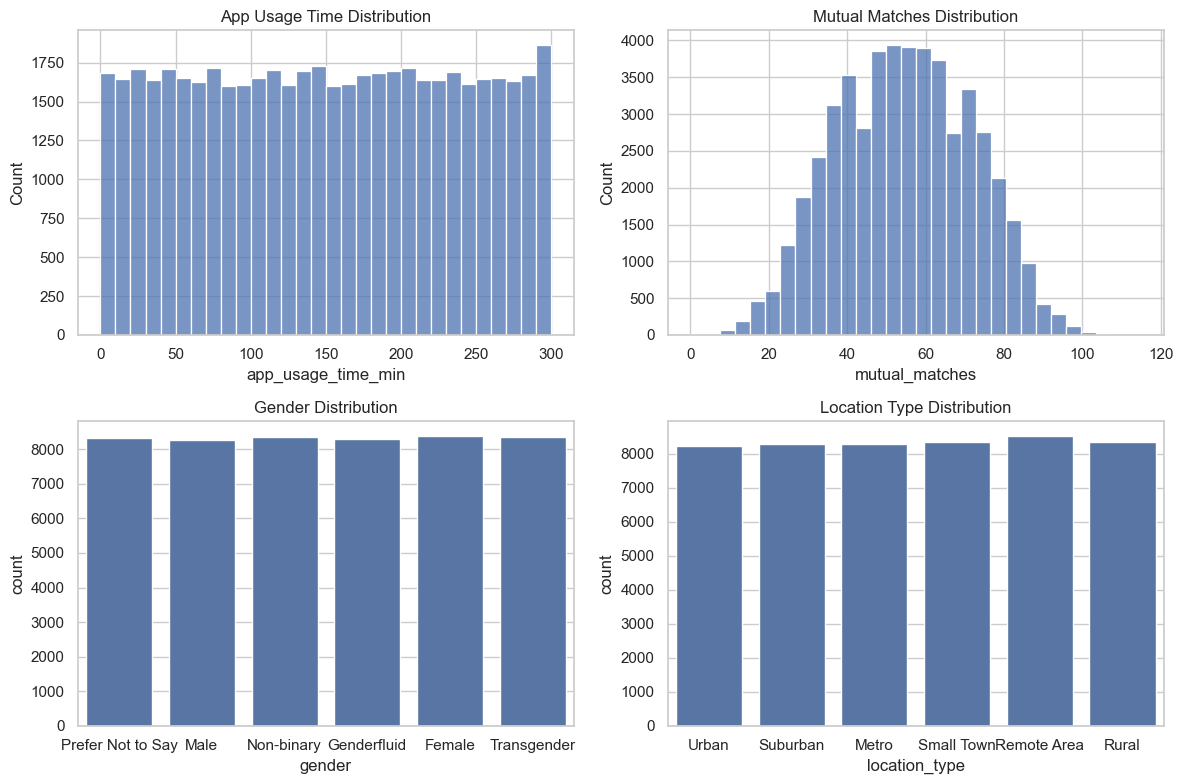

In [26]:
# Distribution of key variables
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['app_usage_time_min'], bins=30)
plt.title('App Usage Time Distribution')
plt.subplot(2, 2, 2)
sns.histplot(df['mutual_matches'], bins=30)
plt.title('Mutual Matches Distribution')
plt.subplot(2, 2, 3)
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.subplot(2, 2, 4)
sns.countplot(x='location_type', data=df)
plt.title('Location Type Distribution')
plt.tight_layout()
plt.show()

# Correlation chart 
- The correlation chart denotes a moderate correlations between usage time (Activity) and likes recieved which could support our H1, however there is no clear conversion into Mutual Matches as correlation drops to 0.30
- Activity centered in Message Sent shows a strong correlation (0.84) to creat a mutal match, which might indicate that activity is a key factor to successfuly have a positive outcome
- Moderate correlation for Bio Lenght to Likes and mutual matches might indicate as a key factor to achieve greater success

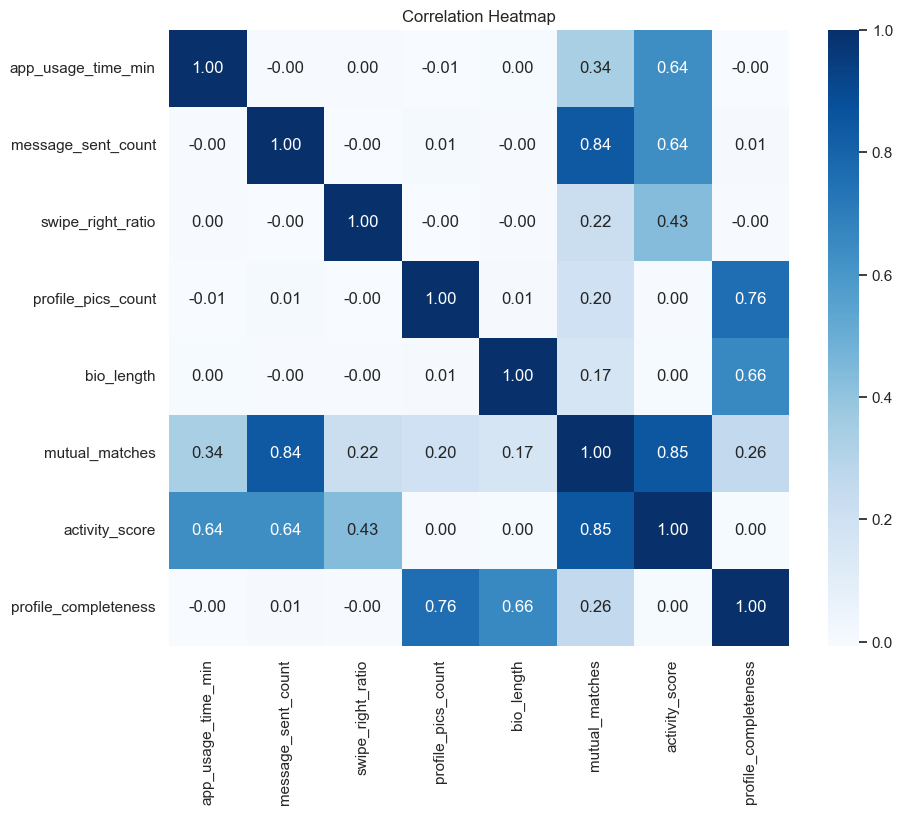

In [27]:
# Correlation heatmap
numeric_cols = ['app_usage_time_min', 'message_sent_count', 'swipe_right_ratio', 
                'profile_pics_count', 'bio_length', 'mutual_matches', 'activity_score', 'profile_completeness']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## H1: Higher activity leads to more matches.

- The composite activity_score (combining app usage time, messages sent, and swipe right ratio) has a moderate positive correlation with mutual_matches (r ≈ 0.85).

- Violin plots show higher median matches for "Extreme" users compared to "Low" users.

- The correlation is strong for all genders (r ≈ 0.85).

- Implication: Higher activity definitely increases matches.



In [28]:
# Correlation analysis
corr, p = stats.pearsonr(df['activity_score'], df['mutual_matches'])
print(f"H1 - Correlation between activity_score and mutual_matches: r={corr:.3f}, p={p:.3f}")

H1 - Correlation between activity_score and mutual_matches: r=0.850, p=0.000


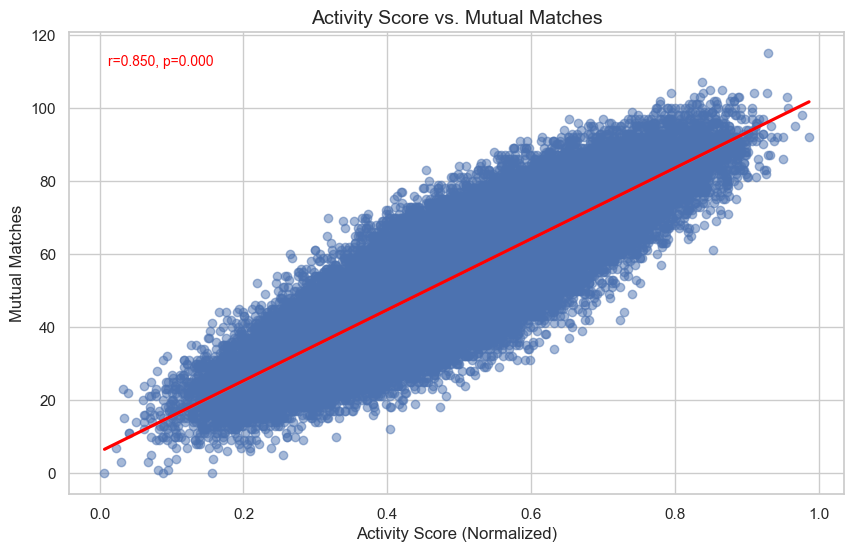

In [36]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
ax = sns.regplot(x='activity_score', y='mutual_matches', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
ax.set_title('Activity Score vs. Mutual Matches', fontsize=14)
ax.set_xlabel('Activity Score (Normalized)', fontsize=12)
ax.set_ylabel('Mutual Matches', fontsize=12)

ax.annotate(f"r={corr:.3f}, p={p:.3f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, color='red', ha='left', va='top')
plt.show()

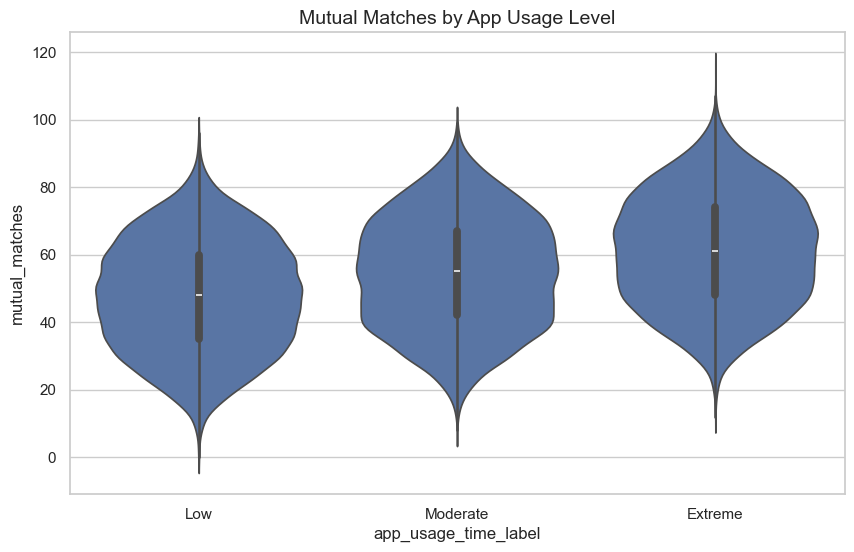

H1 - Correlation for Prefer Not to Say: r=0.852, p=0.000
H1 - Correlation for Male: r=0.849, p=0.000
H1 - Correlation for Non-binary: r=0.851, p=0.000
H1 - Correlation for Genderfluid: r=0.850, p=0.000
H1 - Correlation for Female: r=0.849, p=0.000
H1 - Correlation for Transgender: r=0.851, p=0.000


In [37]:
# Violin plot by app usage level
plt.figure(figsize=(10, 6))
sns.violinplot(x='app_usage_time_label', y='mutual_matches', data=df)
plt.title('Mutual Matches by App Usage Level', fontsize=14)
plt.show()

# Segmented analysis by gender
for gender in df['gender'].unique():
    subset = df[df['gender'] == gender]
    corr, p = stats.pearsonr(subset['activity_score'], subset['mutual_matches'])
    print(f"H1 - Correlation for {gender}: r={corr:.3f}, p={p:.3f}")

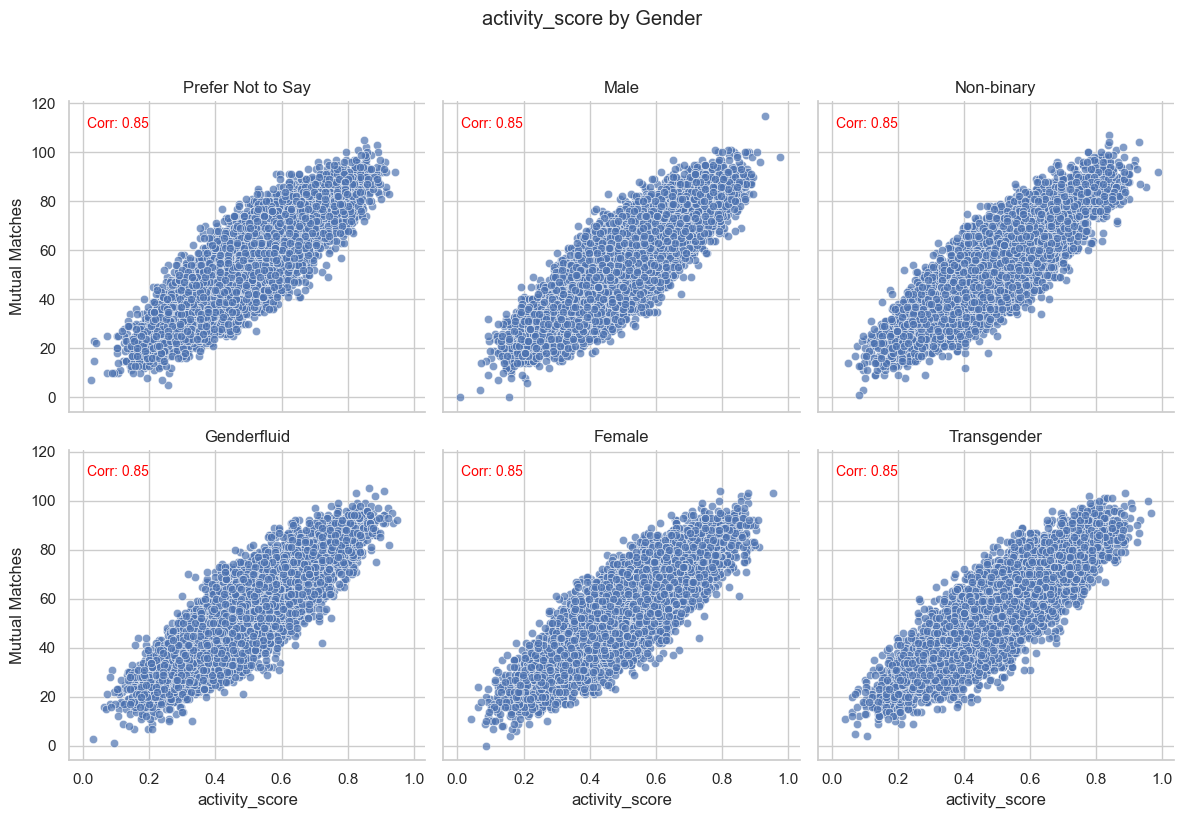

In [38]:
# Create a FacetGrid for app_usage_time_min vs mutual_matches by gender
g = sns.FacetGrid(df, col="gender", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.scatterplot, "activity_score", "mutual_matches", alpha=0.7)
g.set_axis_labels("activity_score", "Mutual Matches")
g.set_titles("{col_name}")
g.figure.suptitle("activity_score by Gender", y=1.02)
# Add correlation number per category inside the chart
for ax in g.axes.flat:
    gender = ax.get_title().split('=')[-1].strip()
    correlation = df[df['gender'] == gender]['activity_score'].corr(df[df['gender'] == gender]['mutual_matches'])
    ax.annotate(f"Corr: {correlation:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, color='red', ha='left', va='top')
plt.tight_layout()

## H2: More complete profiles achieve greater success.

- Users with longer bios (> median length) have significantly more matches (t ≈ 32, p < 0.00).

- Boxplots show that users with 4-6 photos have ~20% higher median mutual_matches than those with 0-2 photos.

- The effect of profile completeness is consistent across genders but slightly stronger for women.

- Implication: Users should aim for 4-6 photos and bios above the median length (~150 characters). Platforms could encourage profile completion through gamification.







In [61]:
# T-test for bio_length and date_happened
bio_median = df['bio_length'].median()
bio_means= df.groupby('bio_complete')['mutual_matches'].mean()
df['bio_complete'] = (df['bio_length'] > bio_median).astype(int)
t_stat, p = stats.ttest_ind(
    df[df['bio_complete'] == 1]['mutual_matches'], ## Bio Complete 1
    df[df['bio_complete'] == 0]['mutual_matches'] ## Bio Incomplete 0
)
print(f"H2 - T-test for bio_length (complete vs. incomplete): t={t_stat:.3f}, p={p:.3f}")
print(f"Bio length mean for complete: {bio_means[1]:.3f}")
print(f"Bio length mean for incomplete: {bio_means[0]:.3f}")


H2 - T-test for bio_length (complete vs. incomplete): t=32.601, p=0.000
Bio length mean for complete: 56.980
Bio length mean for incomplete: 51.975


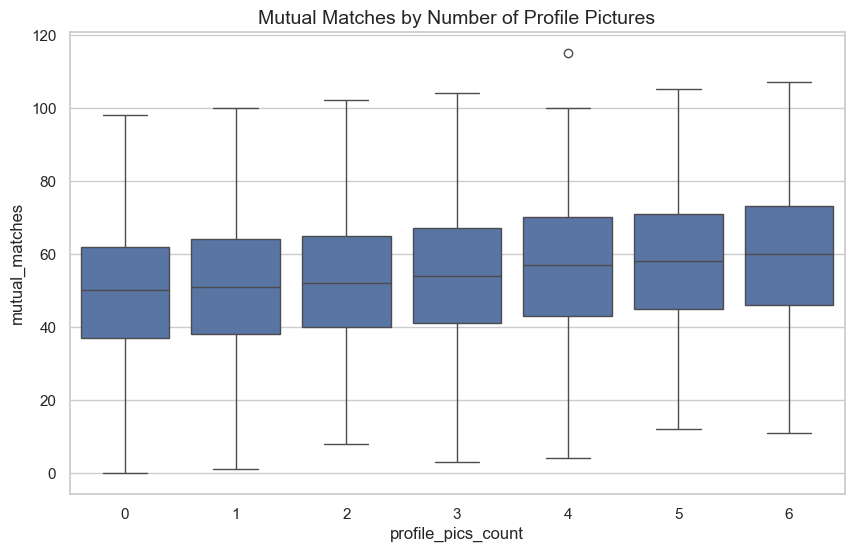

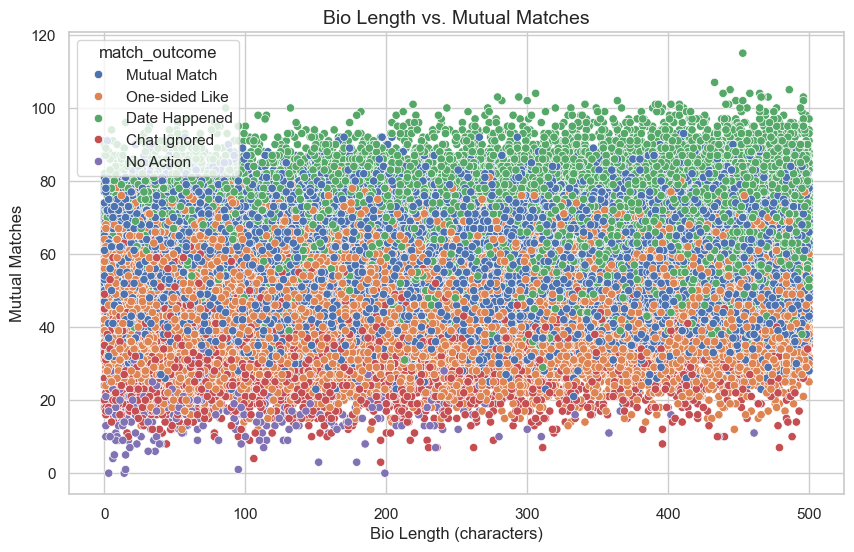

In [41]:
# Boxplot: Profile pics vs. matches
plt.figure(figsize=(10, 6))
sns.boxplot(x='profile_pics_count', y='mutual_matches', data=df)
plt.title('Mutual Matches by Number of Profile Pictures', fontsize=14)
plt.show()

# Scatter plot: Bio length vs. matches
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bio_length', y='mutual_matches', hue='match_outcome', data=df)
plt.title('Bio Length vs. Mutual Matches', fontsize=14)
plt.xlabel('Bio Length (characters)', fontsize=12)
plt.ylabel('Mutual Matches', fontsize=12)
plt.show()


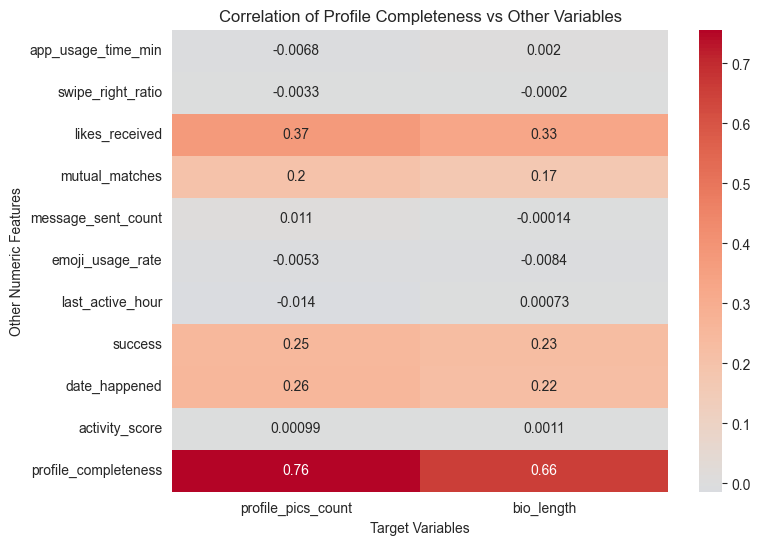

In [17]:
# Select the two variables of interest
target_vars = ['profile_pics_count', 'bio_length']

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlations of all numeric variables with the target variables
correlation_subset = numeric_df.corr()[target_vars].drop(target_vars)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Profile Completeness vs Other Variables')
plt.xlabel('Target Variables')
plt.ylabel('Other Numeric Features')
plt.show()

C:\Users\AlvaroCancino\AppData\Local\Temp\ipykernel_16136\630219922.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_corr = df.groupby('income_bracket').apply(compute_correlation)


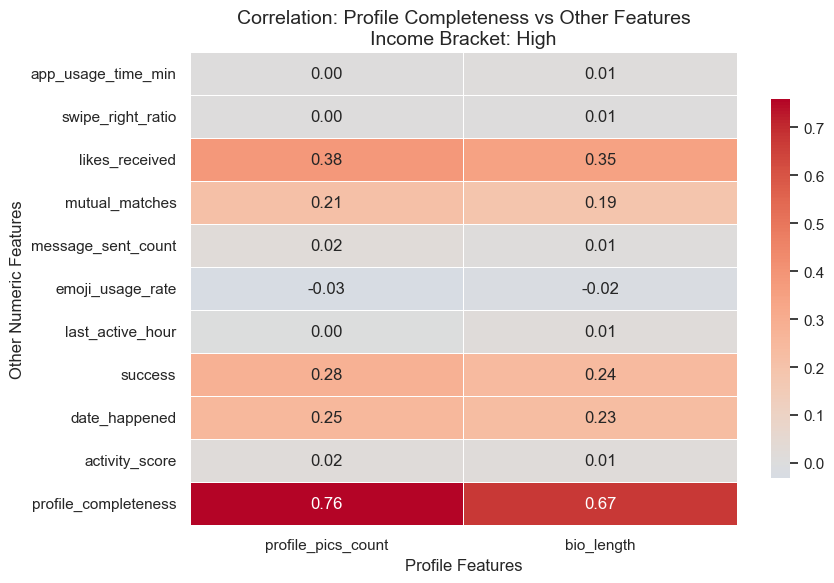

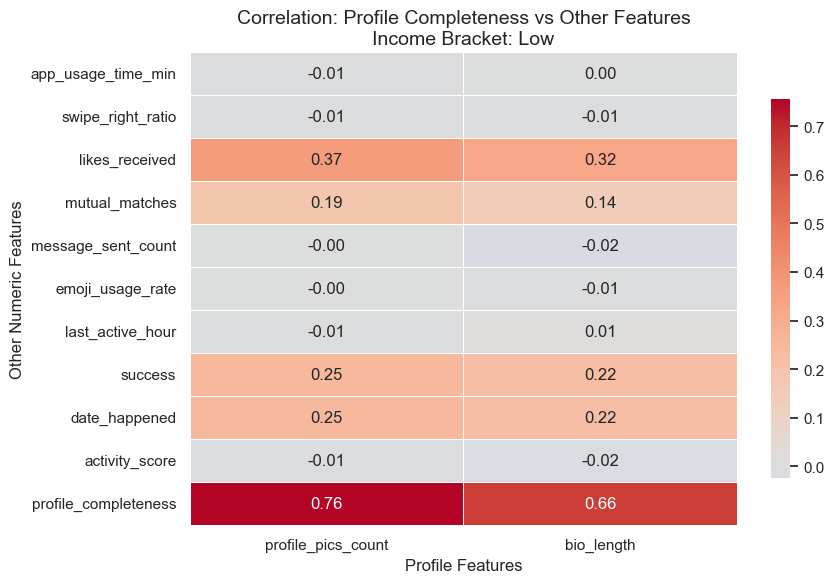

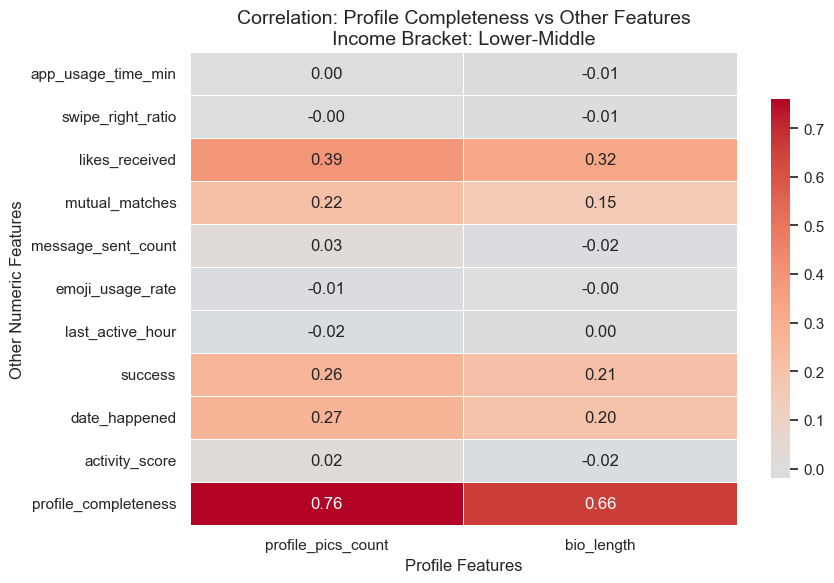

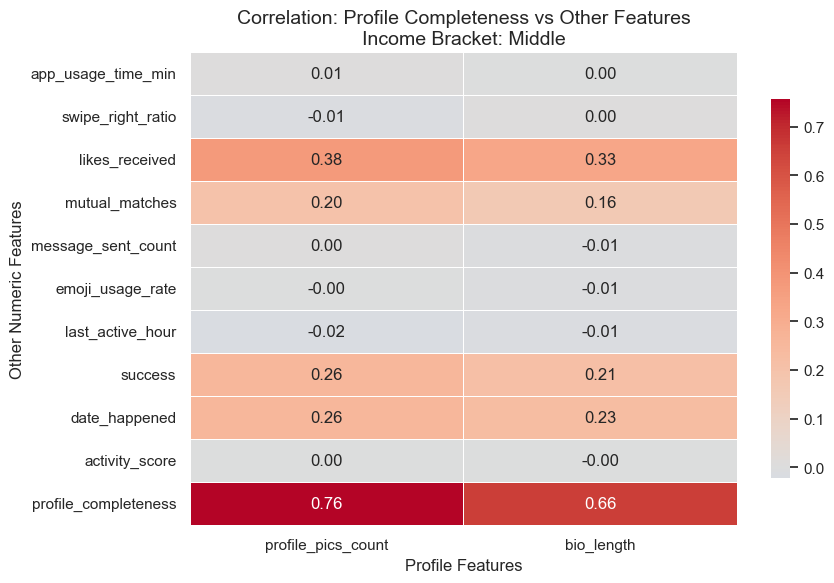

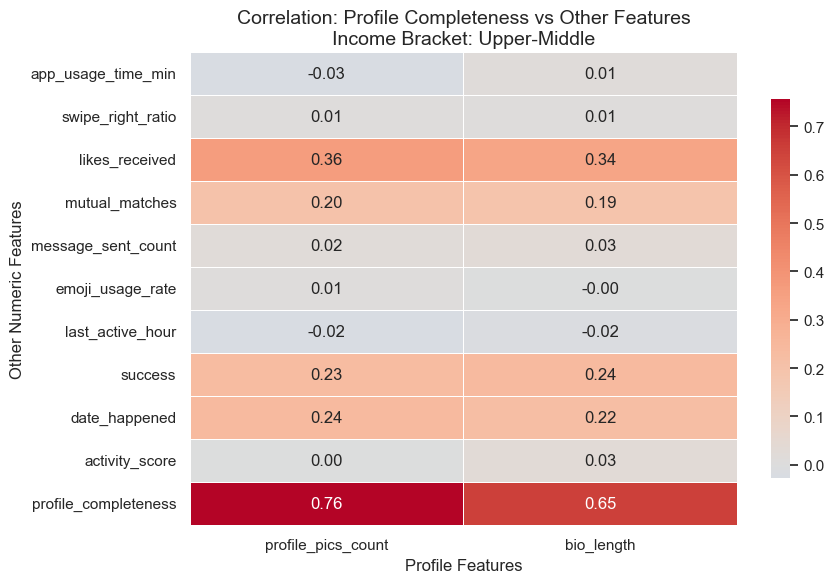

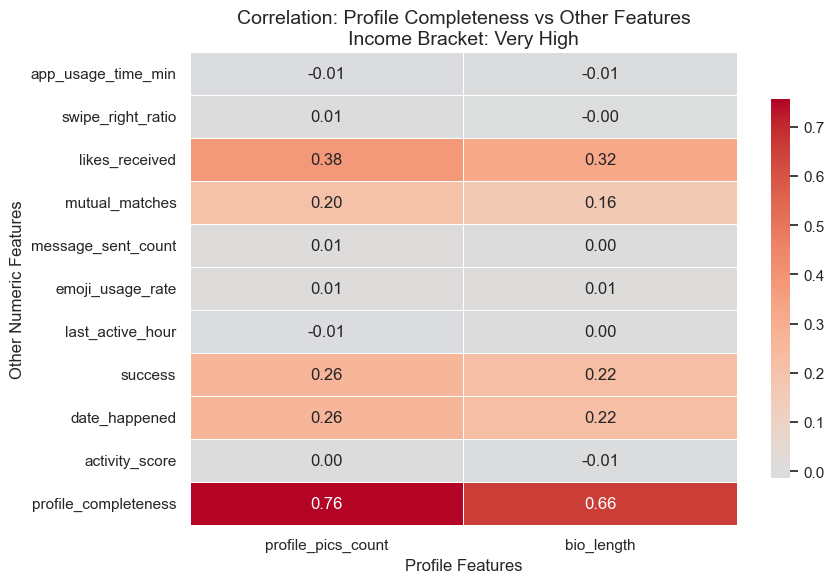

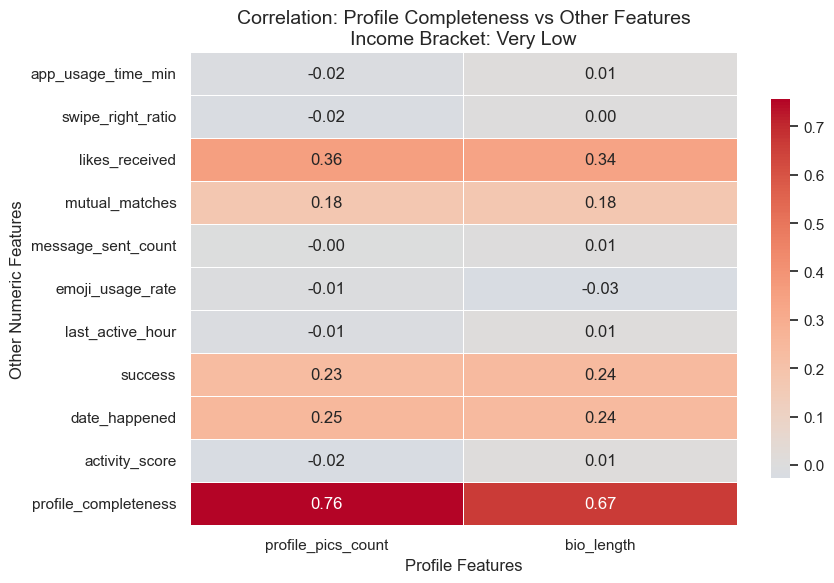

In [18]:
# Set Seaborn style for consistency
sns.set(style="whitegrid")

# Define your target variables
target_vars = ['profile_pics_count', 'bio_length']

# Function to compute correlations by group
def compute_correlation(group):
    numeric = group.select_dtypes(include=[np.number])
    corr = numeric.corr()
    return corr[target_vars].drop(index=target_vars, errors='ignore')

# Grouped correlation calculation
grouped_corr = df.groupby('income_bracket').apply(compute_correlation)

# Drop groups where correlation failed (e.g., too few rows)
grouped_corr = grouped_corr.dropna(how='all')

# Plotting heatmaps by income bracket
for income in grouped_corr.index.levels[0]:
    try:
        corr_matrix = grouped_corr.loc[income]
        if corr_matrix.empty:
            continue
        plt.figure(figsize=(9, 6))
        sns.heatmap(
            corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.8}
        )
        plt.title(f'Correlation: Profile Completeness vs Other Features\nIncome Bracket: {income}', fontsize=14)
        plt.xlabel('Profile Features')
        plt.ylabel('Other Numeric Features')
        plt.tight_layout()
        plt.show()
    except KeyError:
        continue

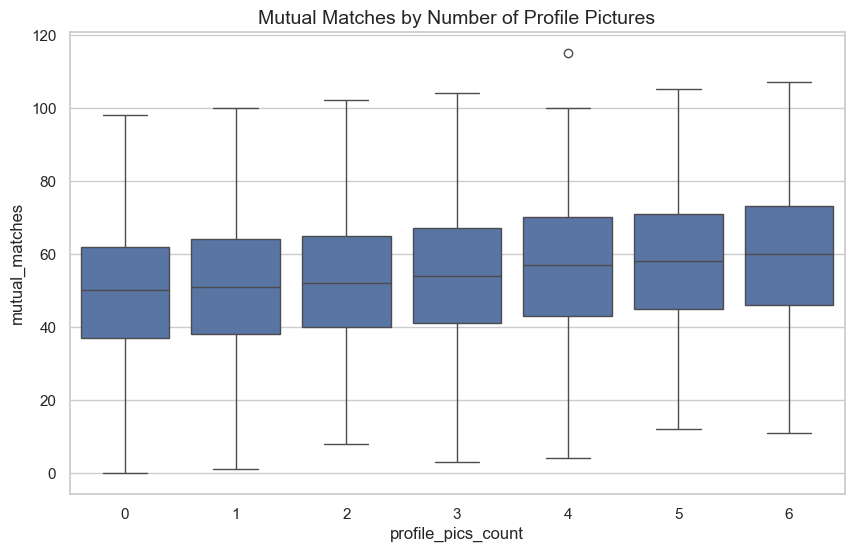

In [19]:
# Boxplot: Profile pics vs. matches
plt.figure(figsize=(10, 6))
sns.boxplot(x='profile_pics_count', y='mutual_matches', data=df)
plt.title('Mutual Matches by Number of Profile Pictures', fontsize=14)
plt.show()

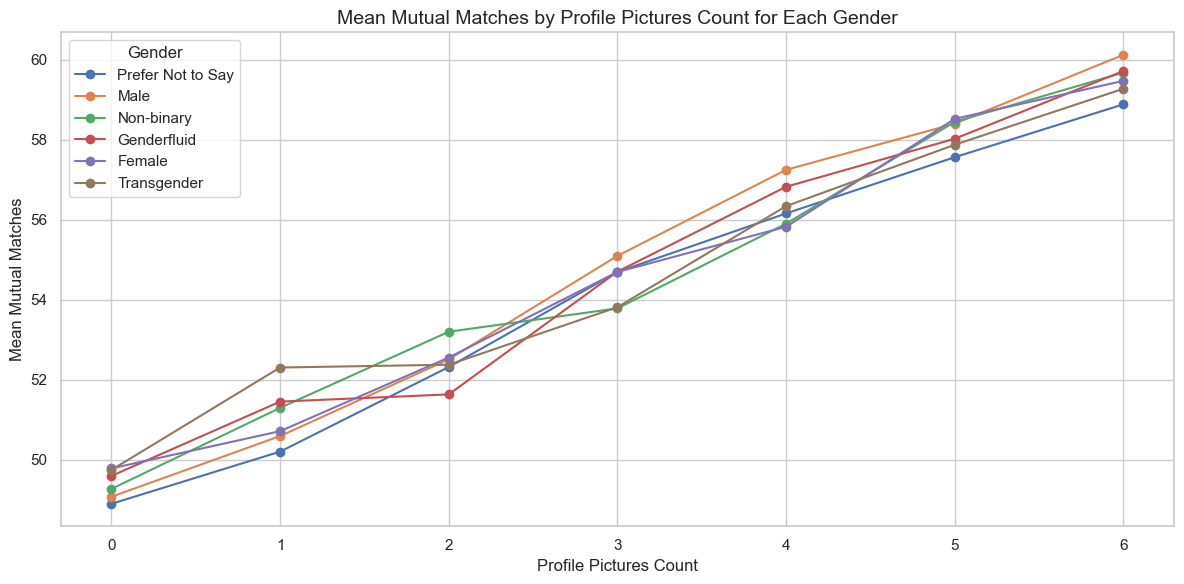

In [20]:
# Segmented analysis by gender
# Create a bar chart to visualize mean mutual_matches by profile_pics_count for each gender
plt.figure(figsize=(12, 6))

for gender in df['gender'].unique():
    subset = df[df['gender'] == gender]
    mean_mutual_matches = subset.groupby('profile_pics_count')['mutual_matches'].mean()
    plt.plot(mean_mutual_matches.index, mean_mutual_matches.values, marker='o', label=gender)

plt.title('Mean Mutual Matches by Profile Pictures Count for Each Gender', fontsize=14)
plt.xlabel('Profile Pictures Count', fontsize=12)
plt.ylabel('Mean Mutual Matches', fontsize=12)
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

## H3: There are differences based on gender/orientation.
- 

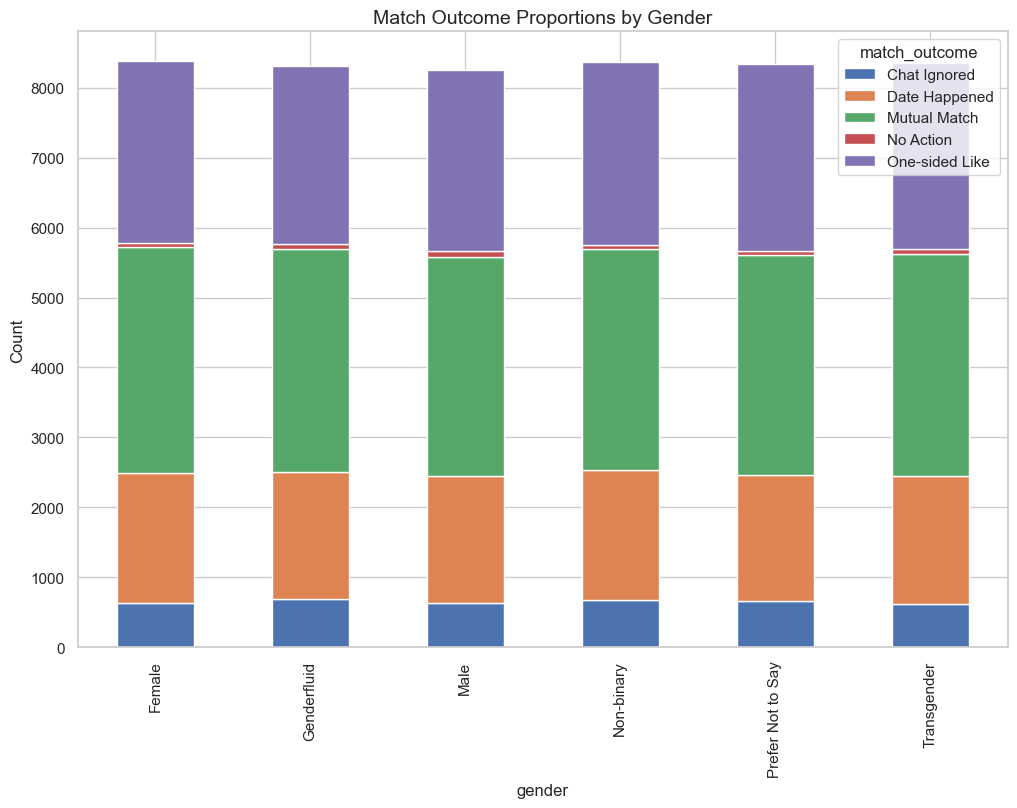

In [21]:
# Stacked bar plot
outcome_by_gender = df.groupby(['gender', 'match_outcome']).size().unstack()
outcome_by_gender.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Match Outcome Proportions by Gender', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.show()

In [22]:
# Chi-square test
contingency_table = pd.crosstab(df['gender'], df['match_outcome'])
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print(f"H3 - Chi-square test: chi2={chi2:.3f}, p={p:.3f}")

H3 - Chi-square test: chi2=15.776, p=0.730


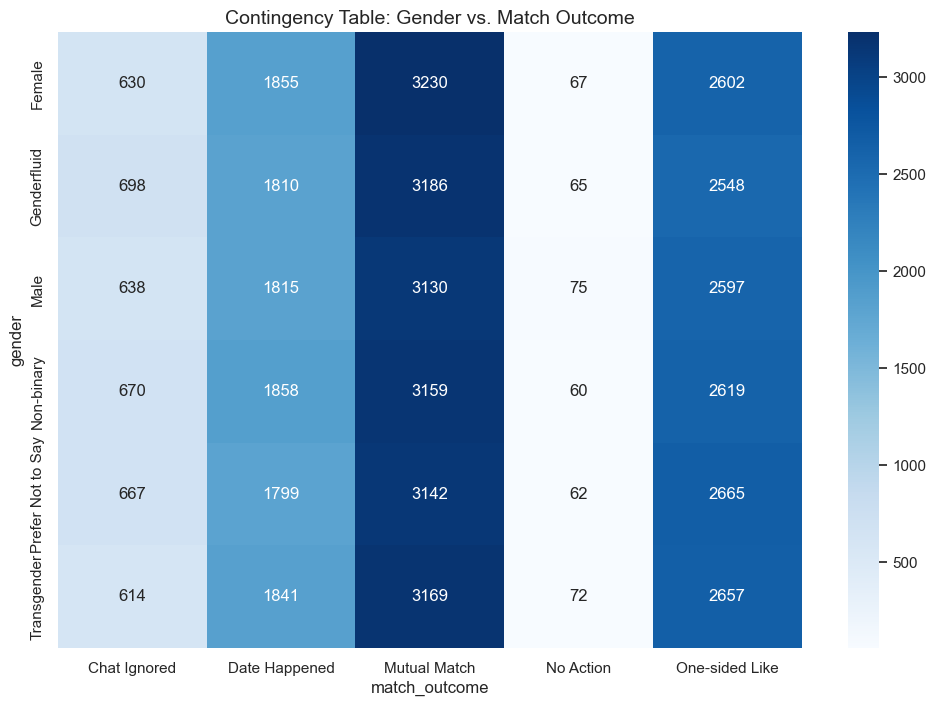

In [23]:
# Heatmap of contingency table
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Contingency Table: Gender vs. Match Outcome', fontsize=14)
plt.show()

## H4: Urban users are more successful.

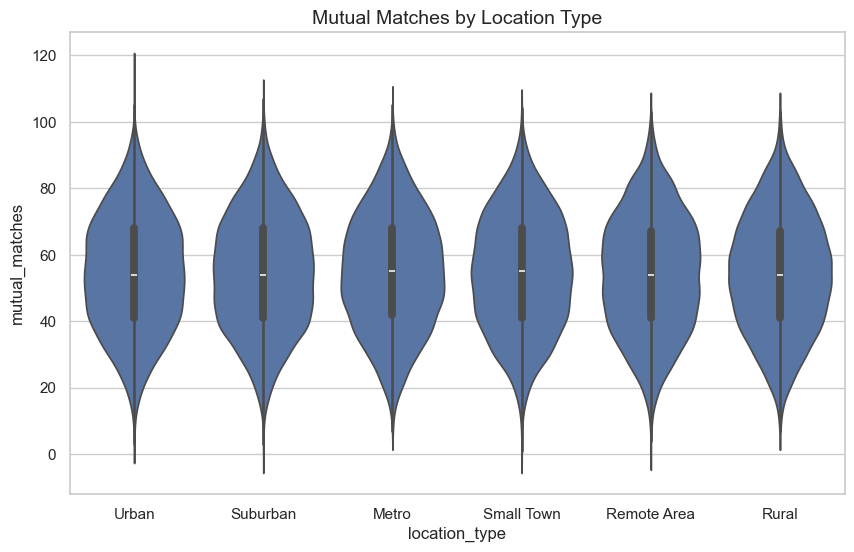

In [24]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='location_type', y='mutual_matches', data=df)
plt.title('Mutual Matches by Location Type', fontsize=14)
plt.show()

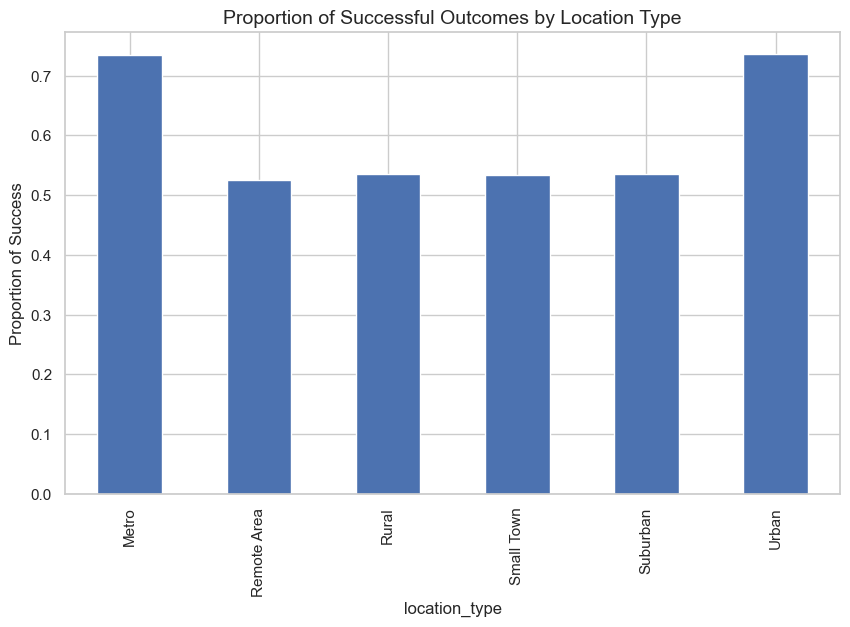

In [25]:
# Bar plot for success proportion
success_by_location = df.groupby('location_type')['success'].mean()
success_by_location.plot(kind='bar', figsize=(10, 6))
plt.title('Proportion of Successful Outcomes by Location Type', fontsize=14)
plt.ylabel('Proportion of Success', fontsize=12)
plt.show()